In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 12.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [10]:
#Importing Libraries
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os
import cv2
import random
import numpy as np
import shutil

In [11]:
shutil.rmtree('/content/Classify_weights')
shutil.rmtree('/content/Detect_weights')

In [12]:
shutil.copytree('/content/drive/MyDrive/Dustbin_Classification/runs_for_Classification/classify/train/weights','/content/Classify_weights')
shutil.copytree('/content/drive/MyDrive/Dustbin_Classification/runs_for_Dustbin_Detection/detect/train/weights','/content/Detect_weights')

'/content/Detect_weights'

In [13]:
model_classify = YOLO('/content/Classify_weights/best.pt')
model_detect=YOLO('/content/Detect_weights/best.pt')

In [6]:
shutil.copytree('/content/drive/MyDrive/Dustbin_Classification/Test_Final_Model','/content/Test')

'/content/Test'

In [14]:
fig=plt.figure(figsize=(10,8))
columns=3
rows=3
files = os.listdir(os.getcwd()+"/Test")
for i in range(1,columns*rows +1):
    file=random.choice(files)
    img=cv2.imread(os.getcwd()+"/Test/"+file)
    img_path = os.getcwd()+"/Test/"+file
    if not os.path.exists(img_path):
      img=bigger = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), (650,480 ))
      fig.add_subplot(rows,columns,i)
      plt.imshow(img)


fig.suptitle("Test Samples ")
plt.show()

<Figure size 1000x800 with 0 Axes>


image 1/1 /content/Test/29.png: 480x640 1 dustbin, 341.3ms
Speed: 7.4ms preprocess, 341.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 256x256 Full 0.57, Not_Full 0.43, 17.1ms
Speed: 6.9ms preprocess, 17.1ms inference, 0.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 /content/Test/150.png: 480x640 1 dustbin, 151.7ms
Speed: 1.9ms preprocess, 151.7ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 256x256 Not_Full 1.00, Full 0.00, 18.3ms
Speed: 4.8ms preprocess, 18.3ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 /content/Test/201.png: 480x640 1 dustbin, 163.3ms
Speed: 5.0ms preprocess, 163.3ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 256x256 Not_Full 0.97, Full 0.03, 17.7ms
Speed: 6.0ms preprocess, 17.7ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 /content/Test/204.png: 480x640 2 dustbins, 150.5ms
Speed: 1.8ms preprocess, 150.5ms inf

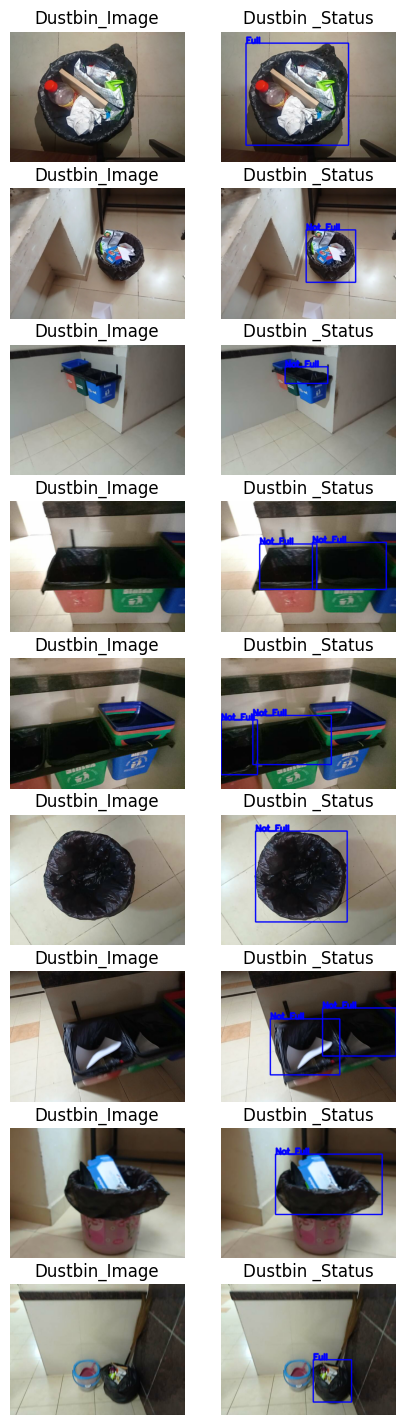

In [15]:
Test_dir=os.getcwd()+"/Test"
rows=len(os.listdir(Test_dir))
fig=plt.figure(figsize=(5,rows*2))
columns=2
i=1
for file in os.listdir(Test_dir):
  if(file.split('.')[1]=='png'):
    file_path=Test_dir+"/"+file
    img=cv2.imread(file_path)
    img  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig.add_subplot(rows,columns,i).title.set_text("Dustbin_Image")
    i=i+1
    plt.axis('off')#
    plt.imshow(img)

    image=img
    for [x1,y1,x2,y2] in model_detect.predict(file_path)[0].boxes.xyxy:
        x1=int(x1)
        x2=int(x2)
        y1=int(y1)
        y2=int(y2)
        result=model_classify.predict(image[x1:x2,y1:y2,:])
        status=result[0].names[np.argmax(result[0].probs.data.tolist())]
        img = cv2.rectangle(img, (x1,y1), (x2,y2), (0,0,255), 4)
        img = cv2.putText(img, status, (x1,y1), cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 6, cv2.LINE_AA)

    fig.add_subplot(rows,columns,i).title.set_text("Dustbin _Status")
    i=i+1
    plt.axis('off')
    plt.imshow(img)
